In [92]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (classification_report, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay, accuracy_score, 
                             balanced_accuracy_score, fbeta_score, f1_score, 
                             precision_score, recall_score)
from sklearn.dummy import DummyClassifier
from sklearn.pipeline import Pipeline
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

import sys
sys.path.append('/Users/miguelflores/Desktop/P1/practica1')
from funciones import funciones_auxiliares as f_aux

seed = 42

In [93]:
X_train = pd.read_csv('/Users/miguelflores/Desktop/DF/X_resampled.csv')
X_test = pd.read_csv('/Users/miguelflores/Desktop/DF/X_test_1.csv')

y_train = pd.read_csv('/Users/miguelflores/Desktop/DF/y_resampled.csv')
y_test = pd.read_csv('/Users/miguelflores/Desktop/DF/y_test_1.csv')

In [94]:
X_train = X_train.drop(columns=['SK_ID_CURR'])
X_test = X_test.drop(columns=['SK_ID_CURR'])

In [95]:
print(X_train.shape)
print(y_train.shape)

(39720, 34)
(39720, 2)


In [96]:
y_train

,Unnamed: 0,0
0,0,0
1,1,0
2,2,0
3,3,0
4,4,0
...,...,...
39715,39715,1
39716,39716,1
39717,39717,1
39718,39718,1


Con la finalidad de evaluar como es que emplear las variables adecuadas, te lleva a la obtención de los mismos resultados que conjuntos de datos donde se presentan más variables, a continuación se presenta un simple modelo para asi obtener la precisión conforme a las diversas variables

### *Base de datos con todas las variables*

In [97]:
X_train_c = pd.read_csv('/Users/miguelflores/Desktop/DF/X_train.csv').set_index('SK_ID_CURR')
X_test_c = pd.read_csv('/Users/miguelflores/Desktop/DF/X_test.csv').set_index('SK_ID_CURR')

y_train_c = pd.read_csv('/Users/miguelflores/Desktop/DF/y_train.csv').set_index('SK_ID_CURR')
y_test_c = pd.read_csv('/Users/miguelflores/Desktop/DF/y_test.csv').set_index('SK_ID_CURR')

In [98]:
datasets = {'Todas las variables': (X_train_c, X_test_c, y_train_c, y_test_c),
            'Selección de variables': (X_train, X_test, y_train, y_test)}

In [99]:
# Lista de los resultados
resultados = []

for conjunto_datos, (X_train, X_test, y_train, y_test) in datasets.items():
    # Manejar y_train con columna extra (Unnamed: 0)
    if isinstance(y_train, pd.DataFrame):
        if y_train.shape[1] > 1:  # Si hay más de una columna
            y_train = y_train.iloc[:, 1].values.ravel()  # Tomar solo la segunda columna (índice 1)
        else:
            y_train = y_train.iloc[:, 0].values.ravel()  # Si hay una columna, usar esa
    
    # Manejar y_test con columna extra (SK_ID_CURR o similar)
    if isinstance(y_test, pd.DataFrame):
        if y_test.shape[1] > 1:  # Si hay más de una columna
            y_test = y_test.iloc[:, -1].values.ravel()  # Tomar la última columna
        else:
            y_test = y_test.iloc[:, 0].values.ravel()  # Si hay una columna, usar esa
    # Crear y entrnar el modelo
    modelo_prueba = DummyClassifier(strategy = 'most_frequent')
    modelo_prueba.fit(X_train, y_train)

    # Predicciones
    y_pred = base_model.predict(X_test)

    # Métrica
    accuracy = accuracy_score(y_test, y_pred)

    # Registrar resultados
    resultados.append({
        'Conjunto de datos': conjunto_datos,
        'Accuracy': accuracy})

# Generar dataframe
df_resultados = pd.DataFrame(resultados)

# Impresion
print("\nResultados de la evaluación de modelos:")
print(df_resultados)


Resultados de la evaluación de modelos:
        Conjunto de datos  Accuracy
0     Todas las variables  0.919272
1  Selección de variables  0.919272


## **Modelos**

In [100]:
X_train.columns = X_train.columns.str.replace(r'[^a-zA-Z0-9_]', '_', regex=True)
X_test.columns = X_test.columns.str.replace(r'[^a-zA-Z0-9_]', '_', regex=True)

[LightGBM] [Warning] Unknown parameter: is_unbalanced
[LightGBM] [Warning] Unknown parameter: is_unbalanced
[LightGBM] [Info] Number of positive: 19860, number of negative: 19860
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003637 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3792
[LightGBM] [Info] Number of data points in the train set: 39720, number of used features: 34
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] Unknown parameter: is_unbalanced

=== Resultados para: LGBMClassifier ===
[LightGBM] [Warning] Unknown parameter: is_unbalanced
Score del modelo: 0.714

--- Métricas estándar ---
Accuracy: 0.71379
Balanced Accuracy: 0.68660
Recall (Sensibilidad): 0.65418
Specificity: 0.71902
Precision: 0.16975
F1 Score: 0.26955
F2 Score: 0.41647

--- Métricas de errores ---
False Di

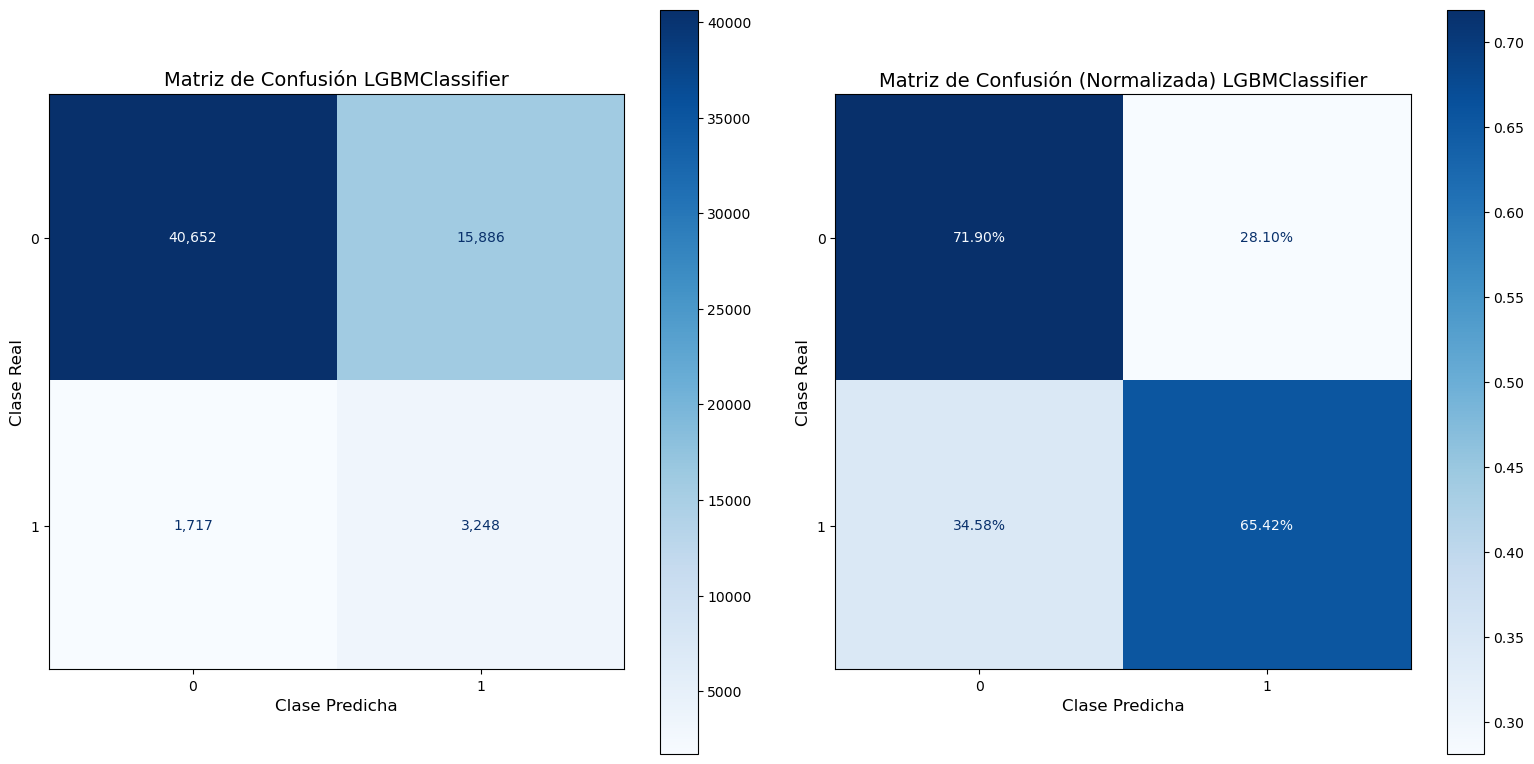

-------------------------------------------------------------------------------------------------------------------------------------------------------------------------

=== Resultados para: XGBClassifier ===
Score del modelo: 0.709

--- Métricas estándar ---
Accuracy: 0.70888
Balanced Accuracy: 0.67226
Recall (Sensibilidad): 0.62860
Specificity: 0.71593
Precision: 0.16270
F1 Score: 0.25850
F2 Score: 0.39970

--- Métricas de errores ---
False Discovery Rate (FDR): 0.83730
False Positive Rate (FPR): 0.28407
False Omission Rate (FOR): 0.04357
False Negative Rate (FNR): 0.37140

Matriz de Confusión:


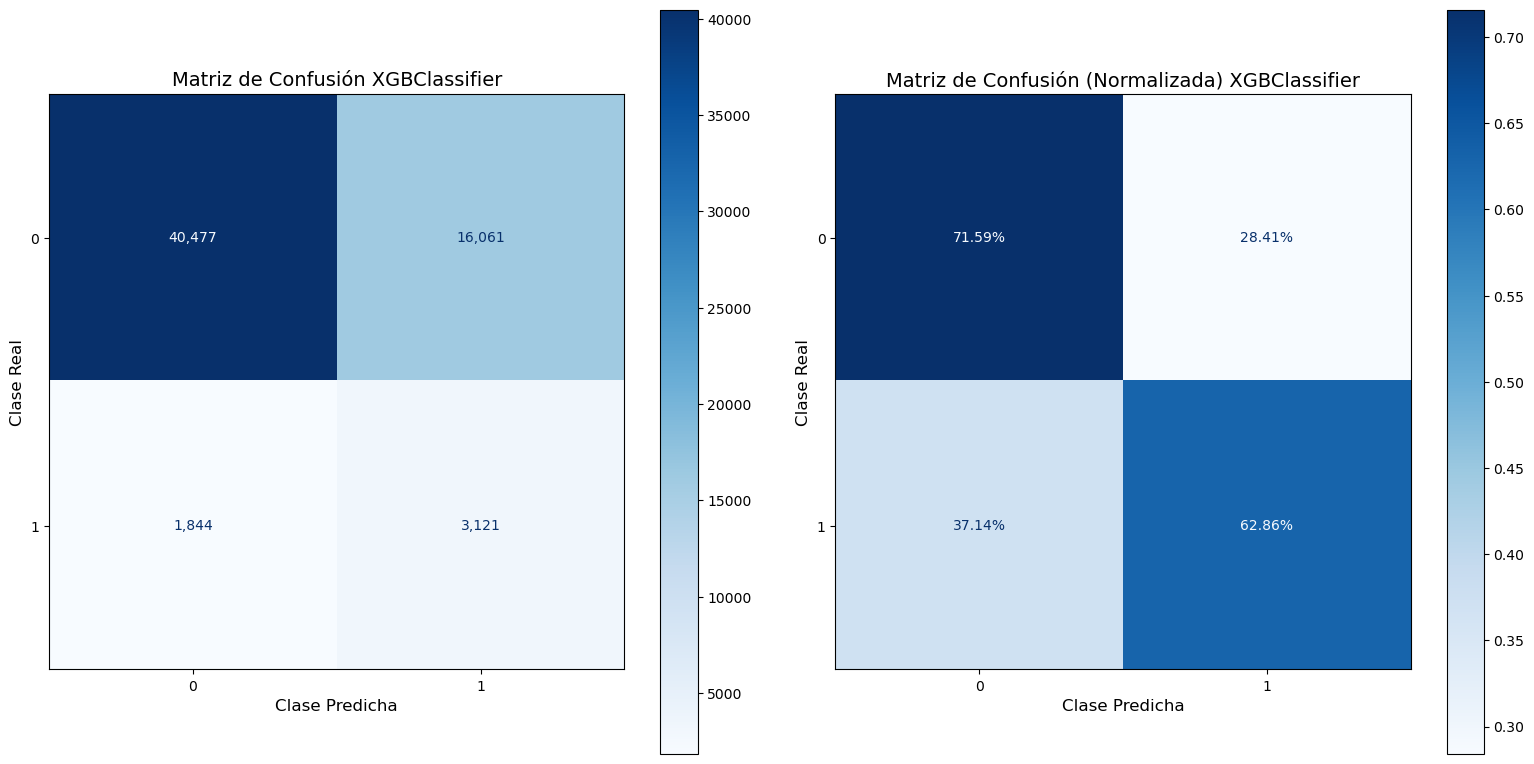

-------------------------------------------------------------------------------------------------------------------------------------------------------------------------

=== Resultados para: RandomForestClassifier ===
Score del modelo: 0.706

--- Métricas estándar ---
Accuracy: 0.70580
Balanced Accuracy: 0.67757
Recall (Sensibilidad): 0.64391
Specificity: 0.71124
Precision: 0.16376
F1 Score: 0.26111
F2 Score: 0.40589

--- Métricas de errores ---
False Discovery Rate (FDR): 0.83624
False Positive Rate (FPR): 0.28876
False Omission Rate (FOR): 0.04212
False Negative Rate (FNR): 0.35609

Matriz de Confusión:


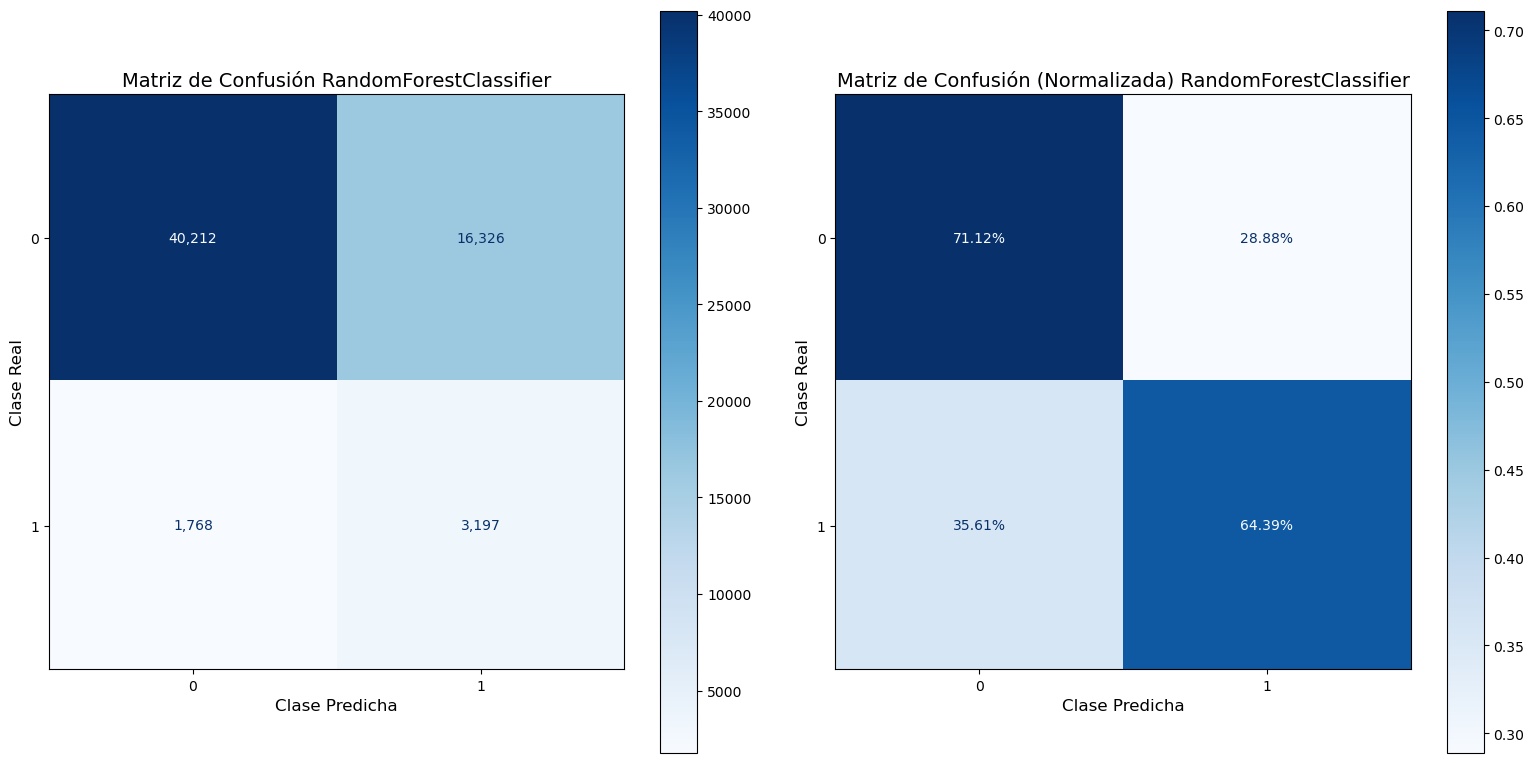

-------------------------------------------------------------------------------------------------------------------------------------------------------------------------

=== Resultados para: LogisticRegression ===
Score del modelo: 0.689

--- Métricas estándar ---
Accuracy: 0.68860
Balanced Accuracy: 0.68071
Recall (Sensibilidad): 0.67130
Specificity: 0.69012
Precision: 0.15983
F1 Score: 0.25819
F2 Score: 0.40933

--- Métricas de errores ---
False Discovery Rate (FDR): 0.84017
False Positive Rate (FPR): 0.30988
False Omission Rate (FOR): 0.04015
False Negative Rate (FNR): 0.32870

Matriz de Confusión:


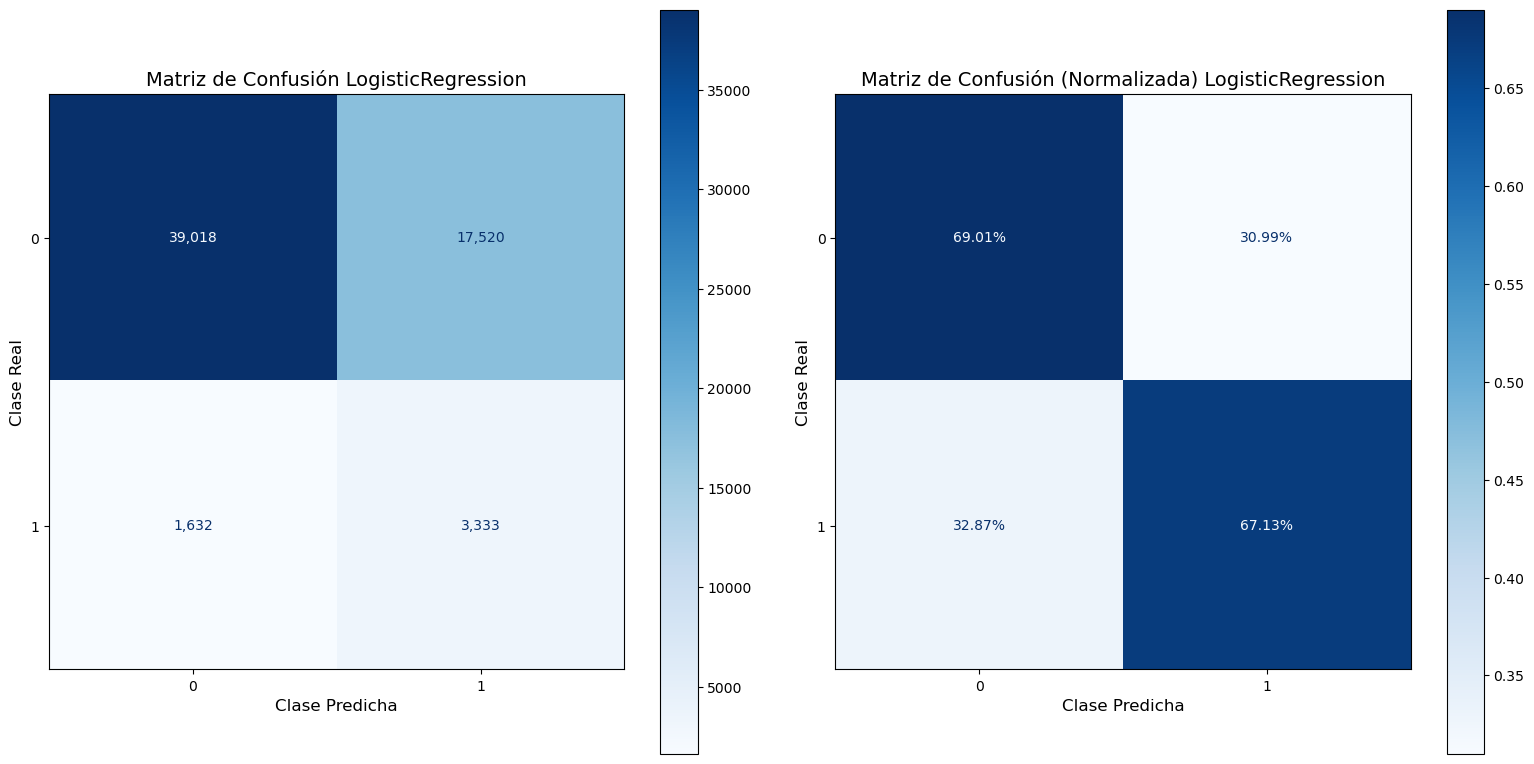

-------------------------------------------------------------------------------------------------------------------------------------------------------------------------

=== Comparación de modelos ===
+------------------------+------------+---------------------+----------+---------------+-------------+------------+------------+----------+----------+-----------+----------+
| Modelo                 |   Accuracy |   Balanced Accuracy |   Recall |   Specificity |   Precision |   F1 Score |   F2 Score |      FDR |      FPR |       FOR |      FNR |
+========================+============+=====================+==========+===============+=============+============+============+==========+==========+===========+==========+
| LGBMClassifier         |   0.713786 |            0.6866   | 0.654179 |      0.719021 |    0.16975  |   0.269555 |   0.416474 | 0.83025  | 0.280979 | 0.0405249 | 0.345821 |
+------------------------+------------+---------------------+----------+---------------+-------------+

In [101]:
import pandas as pd
from sklearn.metrics import (
    confusion_matrix, accuracy_score, balanced_accuracy_score, recall_score, 
    precision_score, f1_score, fbeta_score
)
from sklearn.pipeline import Pipeline
import numpy as np

# Lista de clasificadores
models = [
    LGBMClassifier(is_unbalanced=True, random_state=42),
    XGBClassifier(scale_pos_weight=(np.sum(y_train == 0) / np.sum(y_train == 1)), random_state=42, eval_metric='logloss'),
    RandomForestClassifier(class_weight='balanced', random_state=42),
    LogisticRegression(class_weight='balanced', random_state=42, solver='liblinear')
]

# Lista para almacenar resultados
results = []

# Bucle para entrenar, evaluar y mostrar métricas y matrices
for model in models:
    # Crear pipeline con el clasificador actual
    pipe = Pipeline(steps=[('classifier', model)])
    
    # Entrenar el modelo
    pipe.fit(X_train, y_train)
    
    # Predecir en el conjunto de prueba
    y_pred = pipe.predict(X_test)
    
    # Calcular matriz de confusión y métricas
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    specificity = tn / (tn + fp)
    fdr = fp / (fp + tp)
    fpr = fp / (fp + tn)
    for_ = fn / (fn + tn)
    fnr = fn / (fn + tp)
    
    # Mostrar resultados divididos
    print(f"\n=== Resultados para: {model.__class__.__name__} ===")
    print(f"Score del modelo: {pipe.score(X_test, y_test):.3f}")
    
    # Métricas estándar
    print("\n--- Métricas estándar ---")
    print(f"Accuracy: {accuracy_score(y_test, y_pred):.5f}")
    print(f"Balanced Accuracy: {balanced_accuracy_score(y_test, y_pred):.5f}")
    print(f"Recall (Sensibilidad): {recall_score(y_test, y_pred):.5f}")
    print(f"Specificity: {specificity:.5f}")
    print(f"Precision: {precision_score(y_test, y_pred):.5f}")
    print(f"F1 Score: {f1_score(y_test, y_pred):.5f}")
    print(f"F2 Score: {fbeta_score(y_test, y_pred, beta=2):.5f}")
    
    # Métricas de errores
    print("\n--- Métricas de errores ---")
    print(f"False Discovery Rate (FDR): {fdr:.5f}")
    print(f"False Positive Rate (FPR): {fpr:.5f}")
    print(f"False Omission Rate (FOR): {for_:.5f}")
    print(f"False Negative Rate (FNR): {fnr:.5f}")
    
    # Almacenar métricas en una lista
    results.append({
        'Modelo': model.__class__.__name__,
        'Accuracy': accuracy_score(y_test, y_pred),
        'Balanced Accuracy': balanced_accuracy_score(y_test, y_pred),
        'Recall': recall_score(y_test, y_pred),
        'Specificity': specificity,
        'Precision': precision_score(y_test, y_pred),
        'F1 Score': f1_score(y_test, y_pred),
        'F2 Score': fbeta_score(y_test, y_pred, beta=2),
        'FDR': fdr,
        'FPR': fpr,
        'FOR': for_,
        'FNR': fnr
    })
    
    # Mostrar matriz de confusión
    print("\nMatriz de Confusión:")
    f_aux.m_confusion(y_test, y_pred, modelo=model.__class__.__name__)
    print("-------------------------------------------------------------------------------------------------------------------------------------------------------------------------")

# Convertir resultados en un DataFrame
results_df = pd.DataFrame(results)

# Mostrar tabla comparativa al final
print("\n=== Comparación de modelos ===")
print(tabulate(results_df, headers='keys', tablefmt='grid', showindex=False))


LGBM

In [102]:
param_grid = {
    'classifier__n_estimators': [50, 100, 200, 300],
    'classifier__max_depth': [3, 5, 7, 10],
    'classifier__learning_rate': [0.01, 0.05, 0.1, 0.2],
    'classifier__num_leaves': [20, 31, 40],
    'classifier__subsample': [0.6, 0.8, 1.0],
    'classifier__colsample_bytree': [0.6, 0.8, 1.0]
}

In [103]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.pipeline import Pipeline

# Crear pipeline
pipe = Pipeline(steps=[('classifier', LGBMClassifier(is_unbalanced=True, random_state=42))])

# Configurar búsqueda de hiperparámetros
random_search = RandomizedSearchCV(
    pipe, 
    param_distributions=param_grid, 
    n_iter=100,  # Número de combinaciones a probar
    scoring='recall',  # Métrica de evaluación
    cv=5,  # Número de particiones para validación cruzada
    random_state=42,
    verbose=1
)

# Entrenar
random_search.fit(X_train, y_train)

# Resultados
print("Mejores parámetros:", random_search.best_params_)
print("Mejor puntuación:", random_search.best_score_)


Fitting 5 folds for each of 100 candidates, totalling 500 fits
[LightGBM] [Warning] Unknown parameter: is_unbalanced
[LightGBM] [Warning] Unknown parameter: is_unbalanced
[LightGBM] [Info] Number of positive: 15888, number of negative: 15888
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001847 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3791
[LightGBM] [Info] Number of data points in the train set: 31776, number of used features: 34
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No fu

In [104]:
prediccion = random_search.predict(X_test)
print('Reporte de clasificación')
print(classification_report(y_test, prediccion))

[LightGBM] [Warning] Unknown parameter: is_unbalanced
Reporte de clasificación
              precision    recall  f1-score   support

           0       0.96      0.75      0.84     56538
           1       0.18      0.62      0.28      4965

    accuracy                           0.74     61503
   macro avg       0.57      0.68      0.56     61503
weighted avg       0.89      0.74      0.80     61503



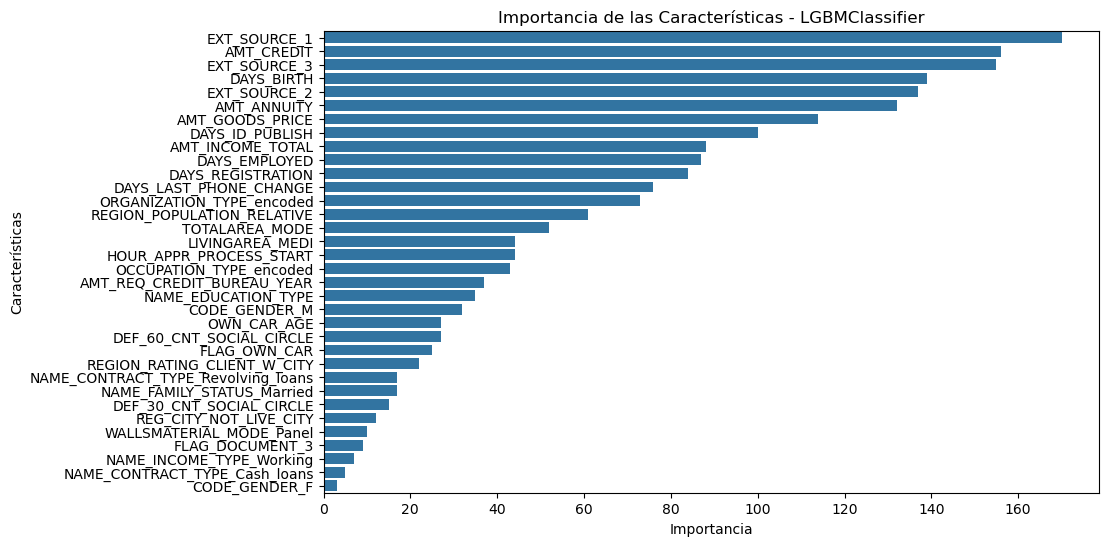

In [105]:
import seaborn as sns
best_model = random_search.best_estimator_

# Obtener las importancias de las características
importances = best_model.named_steps['classifier'].feature_importances_

# Suponiendo que X_train es un DataFrame y contiene las características
feature_names = X_train.columns  # Si X_train es un DataFrame, ajusta según el tipo de datos que tengas

# Ordenar las características por importancia
indices = np.argsort(importances)[::-1]

# Crear un DataFrame con las importancias de las características
importance_df = pd.DataFrame({
    'Feature': feature_names[indices],
    'Importance': importances[indices]
})

# Graficar las importancias de las características
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Importancia de las Características - LGBMClassifier')
plt.xlabel('Importancia')
plt.ylabel('Características')
plt.show()

In [107]:
recall_score(y_test, prediccion)

0.6177240684793555

In [108]:
precision_score(y_test, prediccion)

0.17797249463239134

[LightGBM] [Warning] Unknown parameter: is_unbalanced


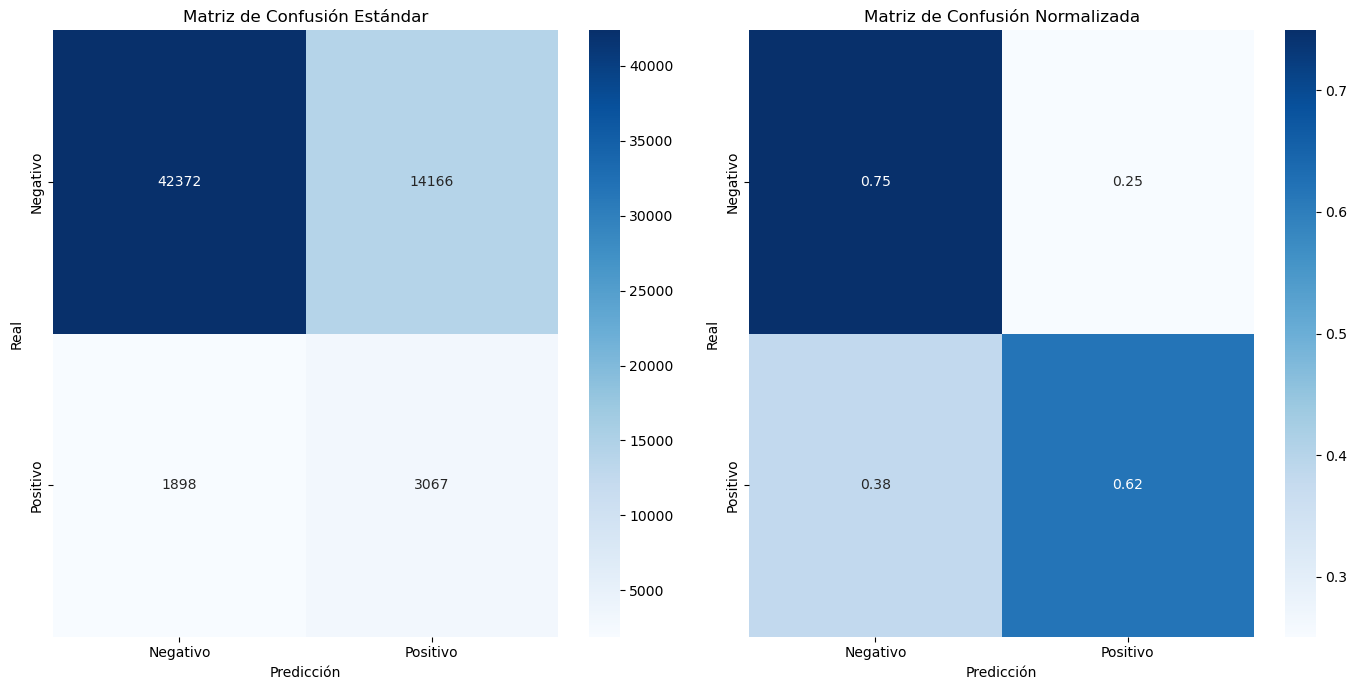

In [110]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
import numpy as np

# Obtener el mejor modelo después de RandomizedSearchCV
best_model = random_search.best_estimator_

# Predicción en el conjunto de prueba
y_pred = best_model.predict(X_test)

# Calcular la matriz de confusión
cm = confusion_matrix(y_test, y_pred)

# Normalizar la matriz de confusión
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

# Crear la figura con 2 subgráficos (1 fila, 2 columnas)
fig, axes = plt.subplots(1, 2, figsize=(14, 7))

# Graficar la matriz de confusión estándar en el primer subgráfico
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negativo', 'Positivo'], yticklabels=['Negativo', 'Positivo'], ax=axes[0])
axes[0].set_title('Matriz de Confusión Estándar')
axes[0].set_xlabel('Predicción')
axes[0].set_ylabel('Real')

# Graficar la matriz de confusión normalizada en el segundo subgráfico
sns.heatmap(cm_normalized, annot=True, fmt='.2f', cmap='Blues', xticklabels=['Negativo', 'Positivo'], yticklabels=['Negativo', 'Positivo'], ax=axes[1])
axes[1].set_title('Matriz de Confusión Normalizada')
axes[1].set_xlabel('Predicción')
axes[1].set_ylabel('Real')

# Ajustar la visualización
plt.tight_layout()

# Mostrar el gráfico
plt.show()


[LightGBM] [Warning] Unknown parameter: is_unbalanced


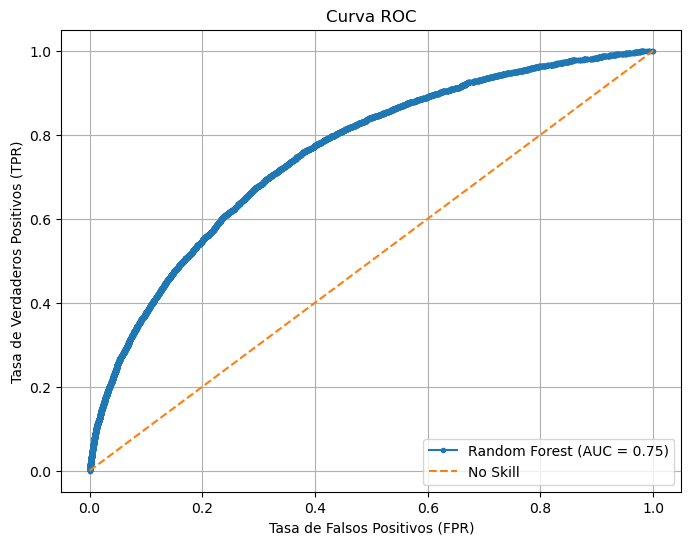

In [112]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Predecir las probabilidades para el conjunto de prueba
prob_predictions = best_model.predict_proba(X_test)  # obtener probabilidades para ambas clases

# Keep probabilities for the positive outcome only (probabilidad para la clase positiva)
yhat = prob_predictions[:, 1]

# Calcular la curva ROC
fpr, tpr, thresholds = roc_curve(y_test, yhat)

# Calcular el área bajo la curva (AUC)
roc_auc = auc(fpr, tpr)

# Graficar la curva ROC
plt.figure(figsize=(8, 6))

# Curva ROC del modelo
plt.plot(fpr, tpr, marker='.', label=f'Random Forest (AUC = {roc_auc:.2f})')

# Línea diagonal (representa un clasificador aleatorio)
plt.plot([0, 1], [0, 1], linestyle='--', label='No Skill')

# Etiquetas de los ejes
plt.xlabel('Tasa de Falsos Positivos (FPR)')
plt.ylabel('Tasa de Verdaderos Positivos (TPR)')

# Título
plt.title('Curva ROC')

# Leyenda
plt.legend(loc='lower right')

# Mostrar el gráfico
plt.grid(True)
plt.show()


In [113]:
gmeans = np.sqrt(tpr * (1-fpr))

In [114]:
gmeans = np.sqrt(tpr * (1-fpr))
ix = np.argmax(gmeans)
print('Best Threshold=%f, G-Mean=%.3f' % (thresholds[ix], gmeans[ix]))

Best Threshold=0.452589, G-Mean=0.690


[LightGBM] [Warning] Unknown parameter: is_unbalanced
Best Threshold = 0.452589, G-Mean = 0.690


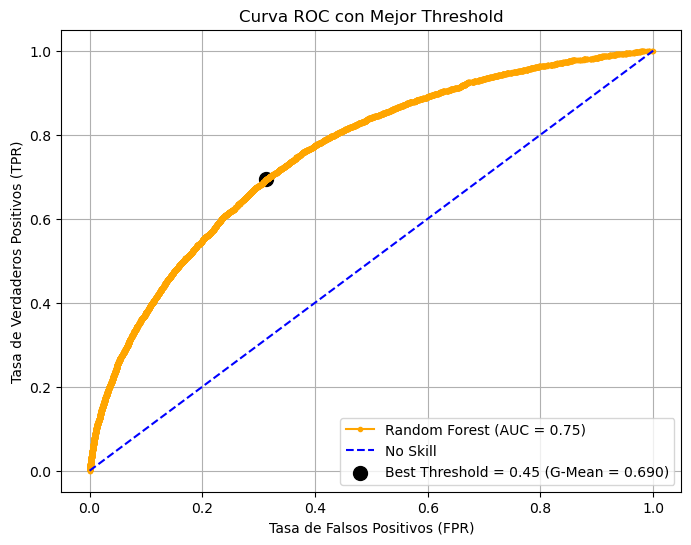

In [118]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Predecir las probabilidades para el conjunto de prueba
prob_predictions = best_model.predict_proba(X_test)  # obtener probabilidades para ambas clases

# Keep probabilities for the positive outcome only (probabilidad para la clase positiva)
yhat = prob_predictions[:, 1]

# Calcular la curva ROC
fpr, tpr, thresholds = roc_curve(y_test, yhat)

# Calcular el área bajo la curva (AUC)
roc_auc = auc(fpr, tpr)

# Calcular G-Mean y el mejor threshold
gmeans = np.sqrt(tpr * (1 - fpr))  # G-Mean
ix = np.argmax(gmeans)  # índice del mejor threshold
best_threshold = thresholds[ix]
best_gmean = gmeans[ix]

# Mostrar el mejor threshold y G-Mean
print(f'Best Threshold = {best_threshold:.6f}, G-Mean = {best_gmean:.3f}')

# Graficar la curva ROC
plt.figure(figsize=(8, 6))

# Curva ROC del modelo (en color naranja)
plt.plot(fpr, tpr, marker='.', color='orange', label=f'Random Forest (AUC = {roc_auc:.2f})')

# Línea diagonal (representa un clasificador aleatorio, en color azul)
plt.plot([0, 1], [0, 1], linestyle='--', color='blue', label='No Skill')

# Mostrar el mejor umbral en la gráfica (en color negro) con tamaño aumentado
# Asegúrate de que el punto se dibuje sobre la línea de la curva
plt.scatter(fpr[ix], tpr[ix], marker='o', color='black', s=100, label=f'Best Threshold = {best_threshold:.2f} (G-Mean = {best_gmean:.3f})')

# Etiquetas de los ejes
plt.xlabel('Tasa de Falsos Positivos (FPR)')
plt.ylabel('Tasa de Verdaderos Positivos (TPR)')

# Título
plt.title('Curva ROC con Mejor Threshold')

# Leyenda
plt.legend(loc='lower right')

# Mostrar el gráfico
plt.grid(True)
plt.show()


[LightGBM] [Warning] Unknown parameter: is_unbalanced


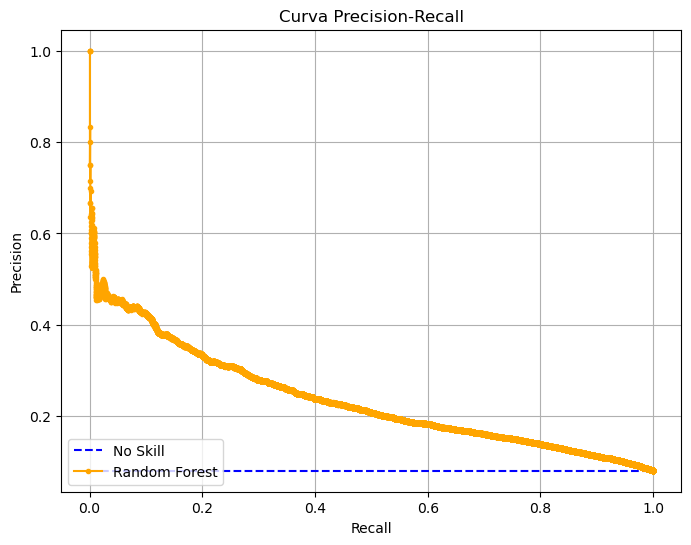

In [119]:
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve

# Predecir las probabilidades para el conjunto de prueba
prob_predictions = best_model.predict_proba(X_test)  # obtener probabilidades para ambas clases

# Keep probabilities for the positive outcome only (probabilidad para la clase positiva)
yhat = prob_predictions[:, 1]

# Calcular la curva Precision-Recall
precision, recall, thresholds = precision_recall_curve(y_test, yhat)

# Calcular la precisión para un clasificador aleatorio (sin habilidad)
no_skill = len(y_test[y_test == 1]) / len(y_test)

# Graficar la curva Precision-Recall
plt.figure(figsize=(8, 6))

# Línea de no habilidad (precision igual a la frecuencia de la clase positiva, en color azul)
plt.plot([0, 1], [no_skill, no_skill], linestyle='--', color='blue', label='No Skill')

# Curva Precision-Recall para el modelo (en color naranja)
plt.plot(recall, precision, marker='.', color='orange', label='Random Forest')

# Etiquetas de los ejes
plt.xlabel('Recall')
plt.ylabel('Precision')

# Título
plt.title('Curva Precision-Recall')

# Leyenda
plt.legend(loc='lower left')

# Mostrar el gráfico
plt.grid(True)
plt.show()


[LightGBM] [Warning] Unknown parameter: is_unbalanced
Best Threshold=0.614354, F-Score=0.300


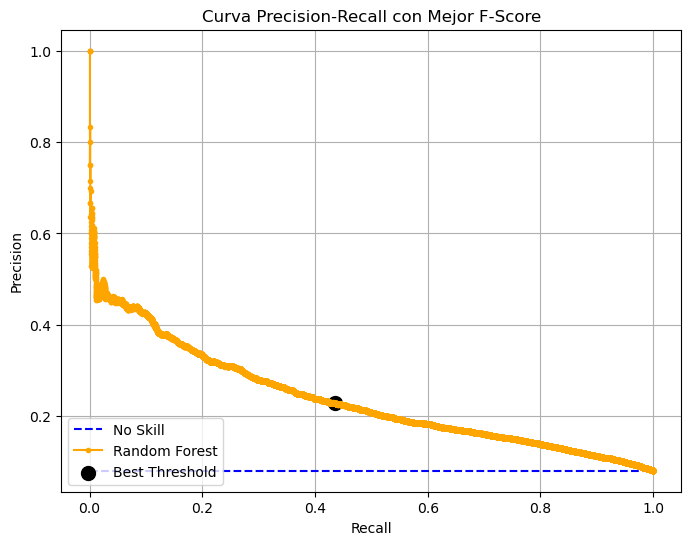

In [120]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve

# Predecir las probabilidades para el conjunto de prueba
prob_predictions = best_model.predict_proba(X_test)  # obtener probabilidades para ambas clases

# Keep probabilities for the positive outcome only (probabilidad para la clase positiva)
yhat = prob_predictions[:, 1]

# Calcular la curva Precision-Recall
precision, recall, thresholds = precision_recall_curve(y_test, yhat)

# Calcular el F-Score para cada umbral
fscore = (2 * precision * recall) / (precision + recall)

# Localizar el índice del F-Score más grande
ix = np.argmax(fscore)
print('Best Threshold=%f, F-Score=%.3f' % (thresholds[ix], fscore[ix]))

# Calcular la precisión para un clasificador aleatorio (sin habilidad)
no_skill = len(y_test[y_test == 1]) / len(y_test)

# Graficar la curva Precision-Recall
plt.figure(figsize=(8, 6))

# Línea de no habilidad (precision igual a la frecuencia de la clase positiva, en color azul)
plt.plot([0, 1], [no_skill, no_skill], linestyle='--', color='blue', label='No Skill')

# Curva Precision-Recall para el modelo (en color naranja)
plt.plot(recall, precision, marker='.', color='orange', label='Random Forest')

# Marcar el punto con el mejor F-Score en la gráfica
plt.scatter(recall[ix], precision[ix], s=100, marker='o', color='black', label='Best Threshold')

# Etiquetas de los ejes
plt.xlabel('Recall')
plt.ylabel('Precision')

# Título
plt.title('Curva Precision-Recall con Mejor F-Score')

# Leyenda
plt.legend(loc='lower left')

# Mostrar el gráfico
plt.grid(True)
plt.show()
